In [2]:
import geopandas as gpd
import rasterio

In [3]:
modelo_digital_elevacion = rasterio.open(r"C:\Users\JuanMa\Google Drive\Mis Videos en Youtube\GeoPandas\05 - GeoPandas y Rasterio - Extraer Información Puntual de un Raster\N04W076.hgt")
modelo_digital_elevacion

<open DatasetReader name='C:/Users/JuanMa/Google Drive/Mis Videos en Youtube/GeoPandas/05 - GeoPandas y Rasterio - Extraer Información Puntual de un Raster/N04W076.hgt' mode='r'>

In [4]:
from rasterio.plot import show

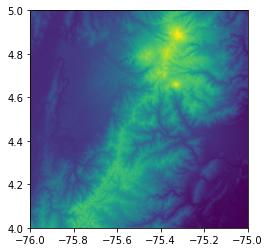

<AxesSubplot:>

In [5]:
show(modelo_digital_elevacion)

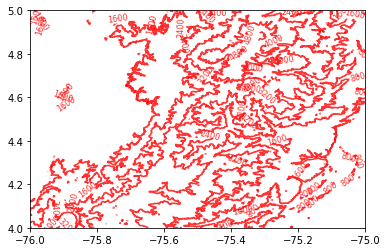

<AxesSubplot:>

In [6]:
show((modelo_digital_elevacion, 1), contour = True)

In [7]:
muestras = gpd.read_file(r"C:\Users\JuanMa\Google Drive\Mis Videos en Youtube\GeoPandas\05 - GeoPandas y Rasterio - Extraer Información Puntual de un Raster\Muestras.shp")
muestras

,Id,Nombre,geometry
0,0,Nevado del Ruiz,POINT (-75.32353 4.88674)
1,0,Ibague,POINT (-75.20061 4.43813)
2,0,Armenia,POINT (-75.67683 4.53683)
3,0,Pereira,POINT (-75.70169 4.81384)


<AxesSubplot:>

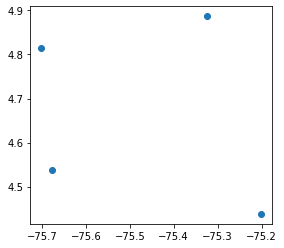

In [8]:
muestras.plot()

In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:>

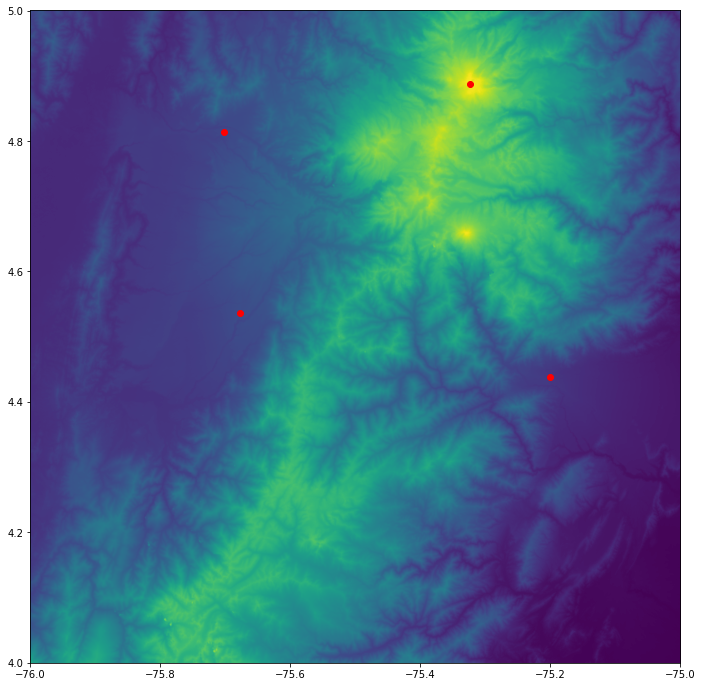

In [10]:
figure, axis = plt.subplots(figsize = (12, 12))
show(modelo_digital_elevacion, ax = axis)
muestras.plot(ax = axis, color = "red")

In [15]:
muestras["geometry"]

0    POINT (-75.32353 4.88674)
1    POINT (-75.20061 4.43813)
2    POINT (-75.67683 4.53683)
3    POINT (-75.70169 4.81384)
Name: geometry, dtype: geometry

In [17]:
muestras["geometry"].y

0    4.886736
1    4.438127
2    4.536833
3    4.813835
dtype: float64

In [21]:
lista_de_coordenadas = [(x, y) for x, y in zip(muestras["geometry"].x, muestras["geometry"].y)]
lista_de_coordenadas

[(-75.32352835799246, 4.886735639686686),
 (-75.20061318526452, 4.438127129245004),
 (-75.67682529731258, 4.536833064523916),
 (-75.70168583552122, 4.813835219736591)]

In [23]:
for coordenada in modelo_digital_elevacion.sample(lista_de_coordenadas):
    print (coordenada)

[5181]
[1114]
[1488]
[1403]


In [24]:
muestras["elevacion"] = [coordenada for coordenada in modelo_digital_elevacion.sample(lista_de_coordenadas)]
muestras

,Id,Nombre,geometry,elevacion
0,0,Nevado del Ruiz,POINT (-75.32353 4.88674),[5181]
1,0,Ibague,POINT (-75.20061 4.43813),[1114]
2,0,Armenia,POINT (-75.67683 4.53683),[1488]
3,0,Pereira,POINT (-75.70169 4.81384),[1403]
